In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [91]:
df = pd.read_csv("weather.csv")
df = df[["temp","dew","humidity","precip","winddir","cloudcover","sealevelpressure","solarradiation","windspeed","moonphase","icon"]]

In [5]:
df["icon"].unique()

array(['rain', 'partly-cloudy-day', 'clear-day', 'cloudy', 'wind'],
      dtype=object)

In [6]:
df["icon"] = df["icon"].map({"rain":1, "partly-cloudy-day":0, "clear-day":0,'cloudy':0,"wind":0})
df.tail()

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase,icon
652,73.5,65.4,78.3,0.012,339.0,61.0,1011.4,151.1,5.1,0.00,1
653,73.2,64.1,74.2,0.020,341.1,65.3,1011.9,105.8,5.4,0.03,1
654,73.1,63.9,74.8,0.000,333.8,32.3,1012.8,169.0,6.5,0.07,0
655,70.7,62.9,78.6,0.000,334.5,0.3,1013.0,187.0,5.6,0.11,0
656,71.0,62.5,77.4,0.000,306.3,3.4,1012.8,188.9,5.8,0.14,0


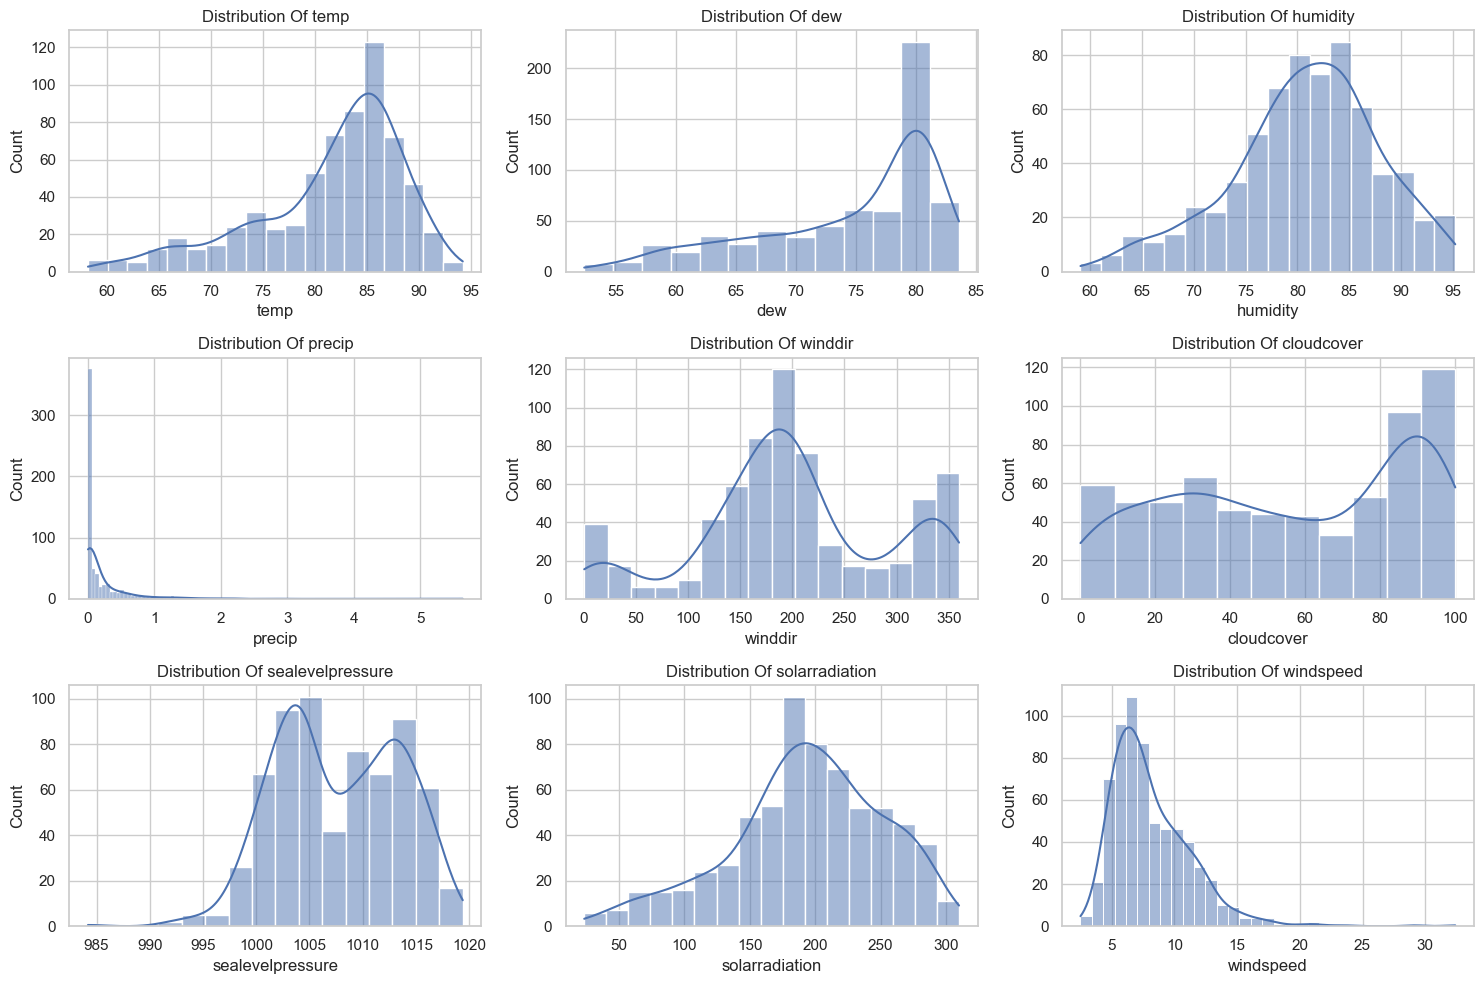

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i,col in enumerate(["temp","dew","humidity","precip","winddir","cloudcover","sealevelpressure","solarradiation","windspeed"],1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution Of {col}")
plt.tight_layout()
plt.show()

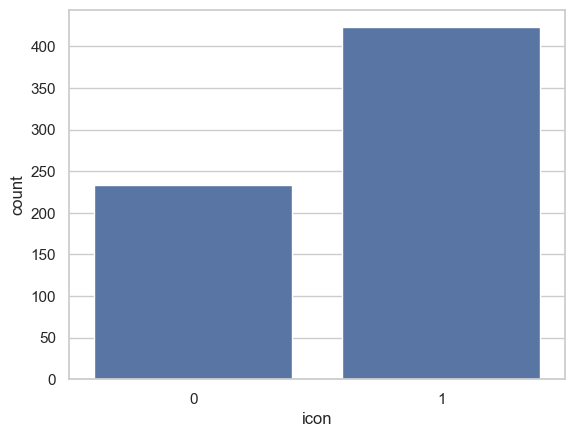

In [10]:
sns.countplot(x="icon",data=df)
plt.show()

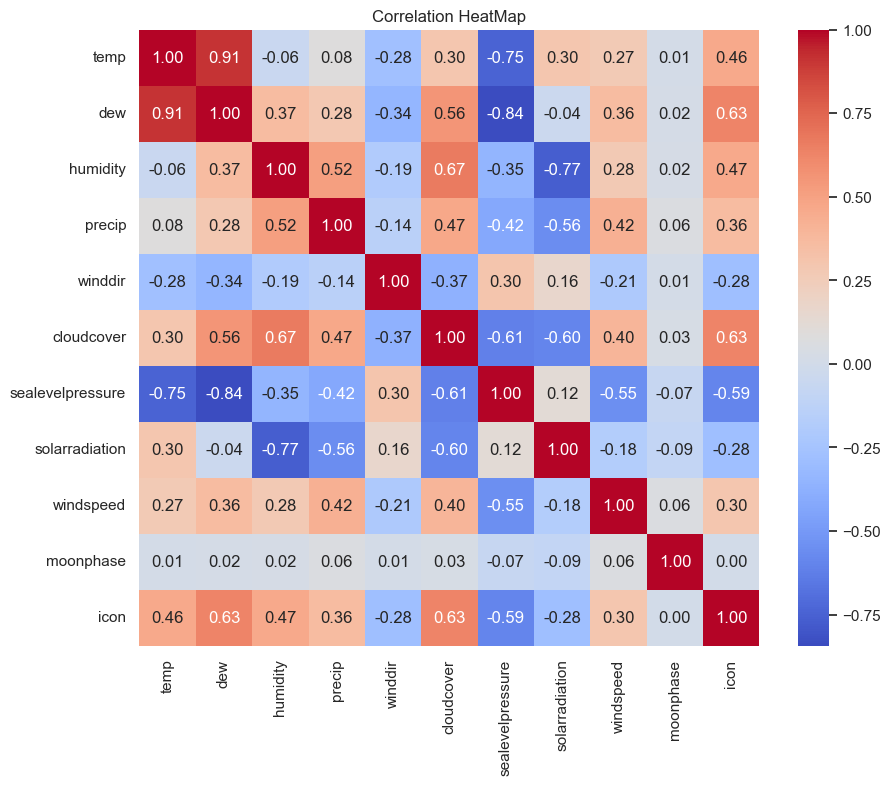

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation HeatMap")
plt.show()

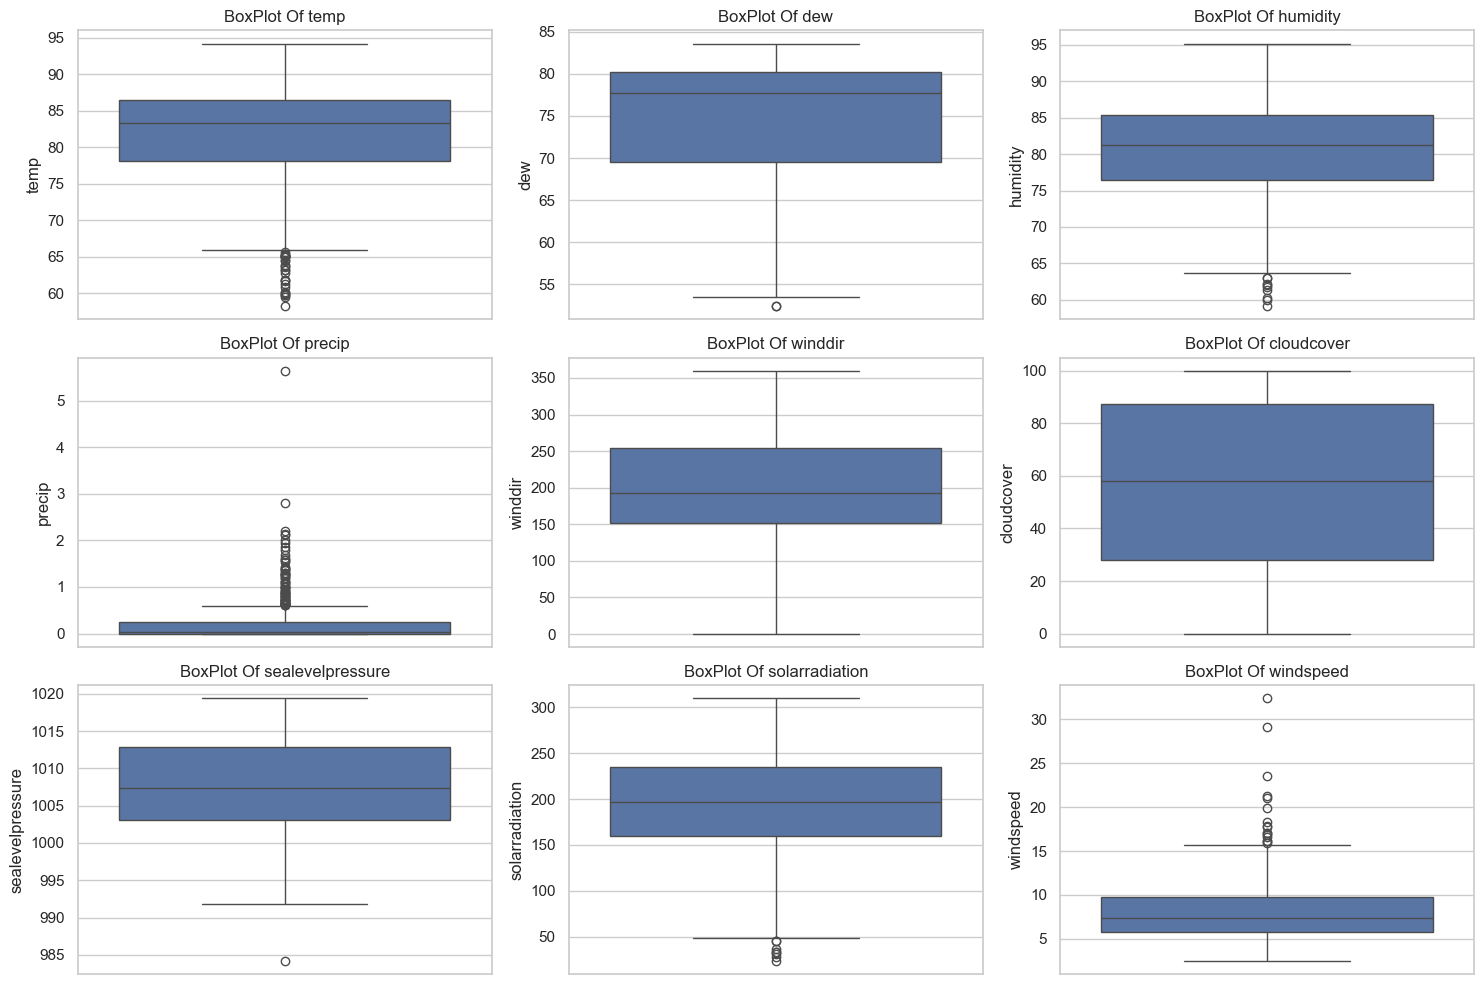

In [12]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(["temp","dew","humidity","precip","winddir","cloudcover","sealevelpressure","solarradiation","windspeed"],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    plt.title(f"BoxPlot Of {col}")
plt.tight_layout()
plt.show()

In [13]:
df["icon"].value_counts()

icon
1    423
0    234
Name: count, dtype: int64

In [14]:
df_maj = df[df["icon"] == 1]
df_min = df[df["icon"] == 0]

In [15]:
print(df_maj.shape)
print(df_min.shape)

(423, 11)
(234, 11)


In [16]:
df_maj_downsampled = resample(df_maj,replace=False,n_samples=len(df_min),random_state=42)

In [17]:
df_maj_downsampled.shape

(234, 11)

In [18]:
df_downsampled = pd.concat([df_maj_downsampled,df_min])
df_downsampled.shape

(468, 11)

In [19]:
df_downsampled.tail()

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase,icon
648,71.4,63.9,79.5,0.0,10.6,73.0,1012.8,178.9,5.4,0.87,0
649,72.7,64.6,77.9,0.0,2.6,77.4,1013.4,172.2,7.2,0.90,0
654,73.1,63.9,74.8,0.0,333.8,32.3,1012.8,169.0,6.5,0.07,0
655,70.7,62.9,78.6,0.0,334.5,0.3,1013.0,187.0,5.6,0.11,0
656,71.0,62.5,77.4,0.0,306.3,3.4,1012.8,188.9,5.8,0.14,0


In [20]:
df_downsampled = df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [21]:
df_downsampled.head()

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase,icon
0,83.3,80.0,90.2,0.238,163.4,95.3,1004.2,152.1,11.4,0.12,1
1,87.4,83.2,87.8,0.233,152.0,87.4,1003.3,149.4,6.3,0.68,1
2,81.8,74.7,80.3,0.052,18.1,87.4,1013.1,203.8,5.8,0.25,1
3,76.4,67.6,76.3,0.000,329.1,11.0,1012.8,201.4,6.3,0.83,0
4,83.7,81.5,93.3,0.726,193.4,99.4,1000.0,105.0,9.6,0.79,1


In [23]:
df_downsampled["icon"].value_counts()

icon
1    234
0    234
Name: count, dtype: int64

In [33]:
X = df_downsampled.drop(columns=["icon"])
y = df_downsampled["icon"]

In [37]:
X

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase
0,83.3,80.0,90.2,0.238,163.4,95.3,1004.2,152.1,11.4,0.12
1,87.4,83.2,87.8,0.233,152.0,87.4,1003.3,149.4,6.3,0.68
2,81.8,74.7,80.3,0.052,18.1,87.4,1013.1,203.8,5.8,0.25
3,76.4,67.6,76.3,0.000,329.1,11.0,1012.8,201.4,6.3,0.83
4,83.7,81.5,93.3,0.726,193.4,99.4,1000.0,105.0,9.6,0.79
...,...,...,...,...,...,...,...,...,...,...
463,82.7,73.8,76.2,0.036,213.3,33.9,1009.0,259.9,6.7,0.21
464,87.6,78.1,74.8,0.000,183.7,36.3,1007.6,257.8,14.5,0.08
465,65.1,59.2,83.0,0.000,17.7,0.2,1016.0,189.5,6.0,0.80
466,84.7,77.2,79.5,0.000,307.8,22.7,1010.6,250.6,6.9,0.36


In [39]:
y

0      1
1      1
2      1
3      0
4      1
      ..
463    1
464    0
465    0
466    0
467    1
Name: icon, Length: 468, dtype: int64

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [49]:
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=1,verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [55]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [90]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [1.         1.         0.99193548]
Mean cross-validation score: 0.9973118279569894


In [92]:
y_pred = best_rf_model.predict(X_test)
print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 1.0
Test set Confusion Matrix:
 [[40  0]
 [ 0 54]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        54

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



In [94]:
df.head(1)

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase,icon
0,74.6,68.4,82.7,0.02,250.2,42.1,1014.5,158.2,6.7,0.93,1


In [118]:
future_data = (10.45,70.3,80,0.01,260.2,45,1015.7,150.3,7,0.80)
future_df = pd.DataFrame([future_data], columns=["temp","dew","humidity","precip","winddir","cloudcover","sealevelpressure","solarradiation","windspeed","moonphase"])
future_df

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase
0,10.45,70.3,80,0.01,260.2,45,1015.7,150.3,7,0.8


In [120]:
prediction = best_rf_model.predict(future_df)
prediction[0]

1

In [122]:
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall




**Save the model using pickle and use it later on**

In [140]:
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}
with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

In [126]:
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [153]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [151]:
future_data = (10.45,70.3,80,0.01,260.2,45,1015.7,150.3,7,0.80)
future_df = pd.DataFrame([future_data], columns=feature_names)

In [157]:
prediction = best_rf_model.predict(future_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [309]:
#predict the next 31 days
model = model_data["model"]
feature_names = model_data["feature_names"]

next_data = pd.read_csv("Khulna 2025-03-01 to 2025-03-31.csv")
raw_data = pd.read_csv("Khulna 2025-03-01 to 2025-03-31.csv")
next_data = next_data[feature_names]

prediction = best_rf_model.predict(next_data)
next_data["Prediction"] = [1 if pred == 1 else 0 for pred in prediction]
    
next_data

,temp,dew,humidity,precip,winddir,cloudcover,sealevelpressure,solarradiation,windspeed,moonphase,Prediction
0,84.6,56.5,47.5,0.000,243.5,42.7,1007.6,270.4,14.3,0.04,0
1,84.7,54.8,44.3,0.000,244.5,91.1,1006.8,261.8,12.8,0.08,0
2,85.9,53.0,42.2,0.000,248.1,19.1,1006.1,278.3,12.3,0.11,0
3,83.9,43.7,32.0,0.000,271.3,3.5,1007.3,285.1,11.2,0.15,0
4,82.6,53.3,46.0,0.000,246.4,5.9,1008.3,282.3,8.5,0.18,0
5,82.9,60.7,53.7,0.000,215.9,57.2,1008.7,275.5,14.1,0.25,0
6,77.3,65.2,71.2,0.004,235.3,11.2,1010.8,NaN,3.1,0.25,1
7,77.3,65.6,71.3,0.008,233.6,18.5,1010.6,NaN,3.6,0.29,1
8,77.8,65.7,71.0,0.071,209.1,19.3,1010.6,NaN,2.2,0.32,1
9,78.5,66.1,70.0,0.114,239.0,27.4,1010.8,NaN,4.0,0.36,1


In [311]:
raw_data["icon"] = raw_data["icon"].apply(lambda x: 1 if x == "rain" else 0)
raw_data["icon"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
Name: icon, dtype: int64